# 1. Imports and config

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
pd.set_option('display.max_rows', 200)

In [2]:
train_data = pd.read_csv('./data/train.csv', index_col='id')

In [3]:
test_data = pd.read_csv('./data/test.csv', index_col='id')

In [4]:
train_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [5]:
test_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
id,,,,,,,,,,,,,,,,,,,,,
250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,1.11394,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,1.09695,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,1.15222,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,1.20157,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,1.16807,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


# 2. Exploratory Data Analysis

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 250000 to 399999
Data columns (total 100 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f0      150000 non-null  float64
 1   f1      150000 non-null  int64  
 2   f2      150000 non-null  float64
 3   f3      150000 non-null  float64
 4   f4      150000 non-null  float64
 5   f5      150000 non-null  float64
 6   f6      150000 non-null  float64
 7   f7      150000 non-null  float64
 8   f8      150000 non-null  float64
 9   f9      150000 non-null  float64
 10  f10     150000 non-null  float64
 11  f11     150000 non-null  float64
 12  f12     150000 non-null  float64
 13  f13     150000 non-null  float64
 14  f14     150000 non-null  float64
 15  f15     150000 non-null  float64
 16  f16     150000 non-null  int64  
 17  f17     150000 non-null  float64
 18  f18     150000 non-null  float64
 19  f19     150000 non-null  float64
 20  f20     150000 non-null  float64
 21  f21 

In [7]:
test_data.shape

(150000, 100)

In [8]:
test_data.size

15000000

In [9]:
test_data.ndim

2

In [10]:
test_data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.513137,51.612380,0.108166,0.047793,3567.849290,8.189529,163.303236,0.379849,16.626872,1.190402,...,0.582965,4858.089360,22.590537,2.028026,0.079295,1.565588,2.422223,0.537009,1.575402,8.045628
std,0.307512,42.662212,1.338636,0.790894,6045.626929,5.443633,181.799298,0.812515,99.813298,0.099975,...,0.445033,8497.126809,14.838069,0.898257,0.590101,9.268188,0.894294,0.226024,0.645402,5.642812
min,-0.064172,-17.000000,-7.952920,-1.491030,-7801.580000,-3.097580,-39.020100,-4.062280,-496.326000,0.929603,...,-0.466885,-12183.200000,-4.134800,0.120638,-2.013430,-24.337800,-1.056300,0.010615,-0.673333,-0.762355
25%,0.254897,18.000000,-0.615063,-0.718730,161.797000,4.129198,27.774750,-0.024041,-17.780300,1.132580,...,0.282301,73.567275,11.585500,1.470310,-0.408236,-4.015442,1.910508,0.359924,1.216300,3.719902
50%,0.516855,41.000000,0.253162,0.003786,935.088500,7.467945,90.090350,0.622288,8.433805,1.170310,...,0.483258,1054.480000,19.939150,1.660235,0.215228,0.811492,2.341185,0.530720,1.449735,7.191640
75%,0.778300,76.000000,0.759430,0.761793,4076.672500,11.016600,239.953000,0.936772,55.053075,1.219200,...,0.770184,5613.215000,32.208850,2.308523,0.502962,6.218857,2.918890,0.708449,1.895472,11.018700
max,1.072210,270.000000,9.931070,1.670420,38434.400000,34.533000,943.297000,4.183330,466.535000,1.711020,...,3.347080,54417.900000,80.209000,5.421360,1.920450,42.504100,5.583770,1.102790,4.472940,33.686300


### Let's check the independent and dependent variables distribution

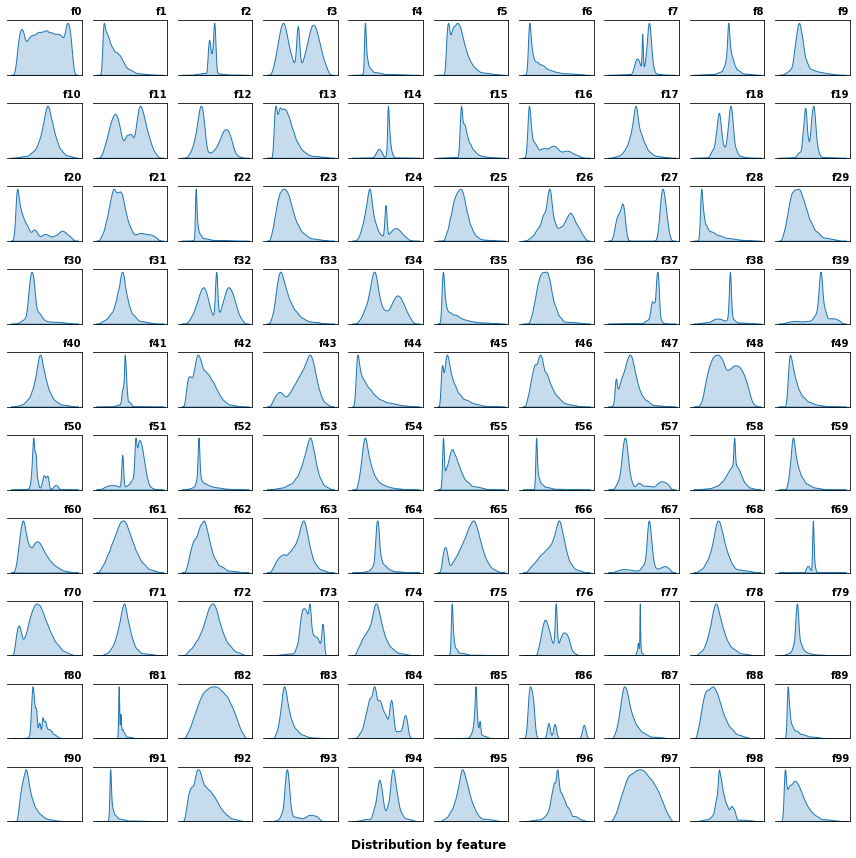

In [11]:
fig, axes = plt.subplots(10,10,figsize=(12, 12))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    sns.kdeplot(data=train_data, x=f'f{idx}', 
                fill=True, 
                ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(f'f{idx}', loc='right', weight='bold', fontsize=10)

fig.supxlabel('Distribution by feature', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

It appears that there is normally distributed, bimodal/trimodal, and skewed independent variables

<Figure size 1440x1440 with 0 Axes>

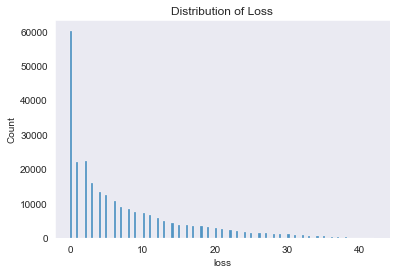

<Figure size 1440x1440 with 0 Axes>

In [12]:
# dependent variable distribution
sns.set_style("dark")
sns.histplot(data=train_data.loss)

plt.title('Distribution of Loss')
plt.figure(figsize=(20,20))

Dependent variable is positively skewed

### EDA Conclusion
- independent variables are all numeric. 
    - some independent variables are integers, but they will not be treated as categoricals

### Training Time
knowing that the data isn't normally distributed, a decent place to start is with a tree-based model. We'll go with the classic RandomForestRegressor

In [13]:
# create matrix of features and prediction vector
X = train_data.iloc[:, 0:-1].values
y = train_data.iloc[:, -1].values

In [14]:
train_data.sample(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,
124212,0.493719,32,0.522199,0.643673,8352.3400,6.44579,217.4520,1.109490,255.69800,1.13579,...,259.346,7.60224,1.00597,0.246155,-3.126880,2.26875,0.468464,0.671705,10.34680,0
106200,0.933062,22,-0.803649,1.036350,315.9260,8.60795,24.2332,1.077010,137.59500,1.17814,...,1043.880,2.54260,1.63393,0.504558,14.574700,1.40160,0.455603,2.331640,7.66224,0
165560,0.534422,0,0.740690,0.975670,13828.8000,4.32107,51.8442,1.057090,309.49100,1.07414,...,1221.190,5.81436,1.87297,0.330773,5.892390,2.32043,0.270009,1.276310,6.14233,2
62858,0.019230,27,0.328887,-0.525132,2211.2800,1.85199,45.4979,0.823387,1.92793,1.11212,...,19507.700,34.60480,2.95915,0.619540,0.939568,2.45292,0.888238,1.134030,2.47848,5
232032,0.991786,20,-0.694994,-0.984014,-52.4951,9.26574,121.6910,0.730314,30.33950,1.16826,...,970.344,23.53940,1.61085,-0.332493,12.573800,2.94863,0.632086,1.107010,12.03040,2


In [15]:
X

array([[-2.34981e-03,  5.90000e+01,  7.66739e-01, ...,  9.24090e-01,
         2.29658e+00,  1.04898e+01],
       [ 7.84462e-01,  1.45000e+02, -4.63845e-01, ...,  4.39152e-01,
         2.36470e+00,  1.14383e+00],
       [ 3.17816e-01,  1.90000e+01, -4.32571e-01, ...,  7.45268e-01,
         1.69679e+00,  1.23055e+01],
       ...,
       [ 4.60228e-02,  5.30000e+01,  4.62863e-01, ...,  8.30533e-01,
         1.00547e+00,  4.55332e-01],
       [ 9.77330e-01,  1.20000e+01, -1.00288e+00, ...,  6.97430e-01,
         9.62347e-01,  7.41589e+00],
       [ 2.44233e-01,  5.10000e+01,  7.29304e-01, ...,  4.52516e-01,
         9.35411e-01,  2.89122e+01]])

In [16]:
y

array([15,  3,  6, ...,  1, 10,  7], dtype=int64)

In [17]:
# import model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [18]:
# make predictions
preds = regressor.predict(test_data)

In [19]:
preds.shape

(150000,)

In [20]:
test_data.index += 250000

In [21]:
# then we need to get a rough idea of how well our model did
# the evaluation metric is root mean squared error
from sklearn import metrics
y_true = train_data.iloc[:, -1].values
y_pred = test_data.iloc[:, -1].values

In [22]:
y_true.shape

(250000,)

In [23]:
y_pred.shape

(150000,)

not sure what i messed up here, but y_pred and y_true have different shapes, which means there is an error when trying to compare them against each other
will see if i can figure out what happened

In [24]:
y_true_new = y_true[0:150000]

In [25]:
y_true_new.shape

(150000,)

In [26]:
# print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
# print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true_new, y_pred, squared=False))
# print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
# print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
# print('Max Error:', metrics.max_error(y_true, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
# print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
# print('R^2:', metrics.r2_score(y_true, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_true, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_true, y_pred))

Root Mean Squared Error (RMSE): 9.811966998446147


Horrible score, so time to analyze what I can do better

In [ ]:
# submit score and admit defeat... for now

In [ ]:
submission = pd.DataFrame({"id": test.index, "loss":preds})
submission.to_csv("submission.csv", index=False)